# Let's Grow More #
## TASK 1 : Iris Flower Classification using ML ##
### Presentor : Shraddha Ingale ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.offline as pyo 
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot 
%matplotlib inline 
from sklearn.metrics import accuracy_score
import os

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

## Importing Iris datset ##

In [3]:
iris=pd.read_csv(r'C:\Users\Sujata\Desktop\UDEMY COURSES\Iris.csv')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.drop('Id',axis=1,inplace=True)


### PetalWitdh Petal Width MAX and MIN ###

In [6]:
px.scatter(iris,x='Species',y='PetalWidthCm',size='PetalWidthCm')

In [7]:
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},inplace=True)

In [8]:
px.scatter_matrix(iris,color='Species',title='Iris matrix ',dimensions=['SepalLength','SepalWidth','PetalWidth','PetalLength'])

### Data Pre Processing  ###


In [9]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
X=iris.drop(['Species'],axis=1)

In [11]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=iris['Species']

In [13]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#### Label Encoding_Decoding ####

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X=np.array(X)

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Split data for training and testing ####

In [18]:
from sklearn.model_selection import train_test_split

X_train_data,X_test_data,y_train_data,y_test_data=train_test_split(X,y,test_size=0.3,random_state=0)

#### Training the model for decision Tree ####

In [19]:
from sklearn import tree
DTree=tree.DecisionTreeClassifier()
DTree.fit(X_train_data,y_train_data)

DecisionTreeClassifier()

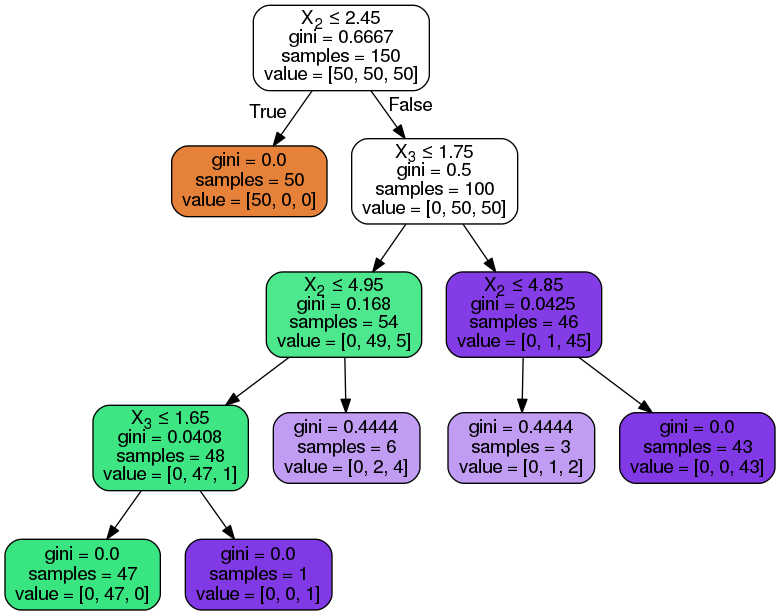

In [20]:
prediction_DT=DTree.predict(X_test_data)
accuracy_DT=accuracy_score(y_test_data,prediction_DT)*100

In [21]:
accuracy_DT

97.77777777777777

In [23]:
prediction_DT

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [22]:
Category=['Iris-Setosa','Iris-versicolor','Iris-Verginica']

### CUSTOM DATA INPUT ###

In [23]:
X_dt=np.array([[7.1,3,5.9,2.1]])
X_dt_prediction=DTree.predict(X_dt)

### RESULT ###

In [24]:
X_dt_prediction[0]
print(Category[int(X_dt_prediction[0])])

Iris-Verginica


# ALGORITHM 2 #
## K-nearest neighbour algorithm ## 

#### scalling of data before feeding it to knn model ####

In [25]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler().fit(X_train_data) 
X_train_std=sc.transform(X_train_data)
X_test_std=sc.transform(X_test_data)

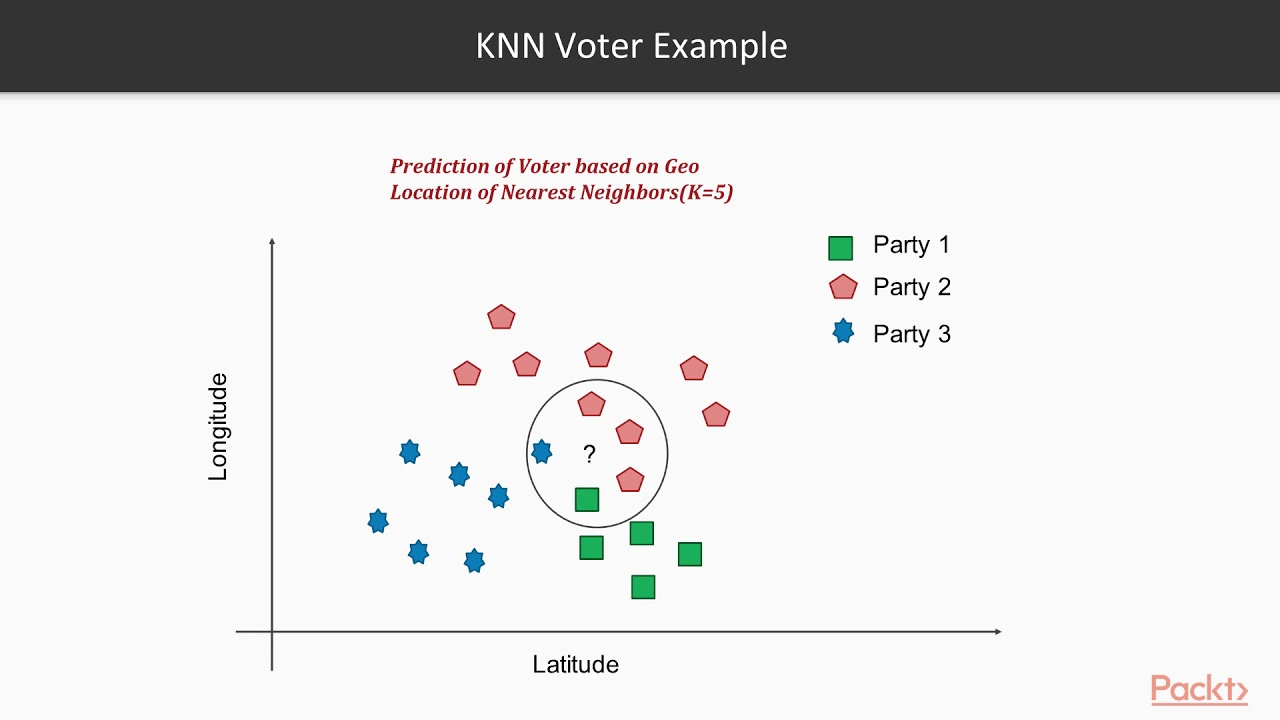

In [26]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=7)

Knn.fit(X_train_std,y_train_data)

KNeighborsClassifier(n_neighbors=7)

In [28]:
predict_knn=Knn.predict(X_test_std)
accuracy_KNN=accuracy_score(y_test_data,predict_knn)*100

In [29]:
accuracy_KNN

97.77777777777777

### CUSTOM DATA INPUT ###

In [30]:
X_KNN=np.array([[4.6,3.6,1,0.2]])


In [ ]:
5.8,3.2,5.7,1.9

In [31]:
X_KNN_std=sc.transform(X_KNN)

In [32]:
X_knn_prediction=Knn.predict(X_KNN_std) 

### RESULT ###

In [33]:
X_knn_prediction[0]
print(Category[int(X_knn_prediction[0])])

Iris-Setosa


# ALGORITHM 3 #
## Kmean Clustering ##

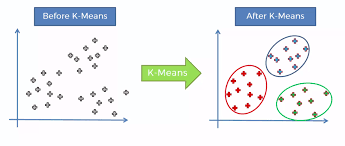

## map before clustering ##

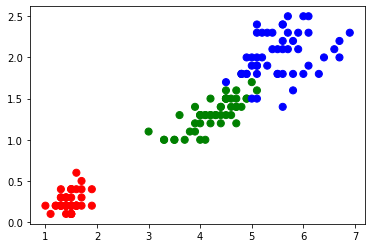

In [34]:
colormap=np.array(['Red','Green','Blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[y],s=50)

In [35]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
from sklearn.cluster import KMeans
Km=KMeans(n_clusters=3,random_state=2,n_jobs=4)
Km.fit(X)

C:\Users\Sujata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



KMeans(n_clusters=3, n_jobs=4, random_state=2)

In [37]:
centers=Km.cluster_centers_
print(centers)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [38]:
Km.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [39]:
Category=[ 'Iris-versicolor','Iris-Setosa', 'Iris-Verginica']

In [40]:
Category

['Iris-versicolor', 'Iris-Setosa', 'Iris-Verginica']

###  Scatterplot of Categories after Clustering ###

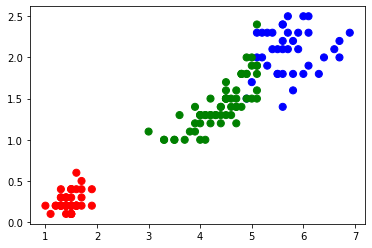

In [78]:
colormap=np.array(['Red','Green','Blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[Km.labels_],s=50)

## Comparing the scatter plots : Actual and Predicted ##

Text(0.5, 1.0, 'Predicted by clustering model')

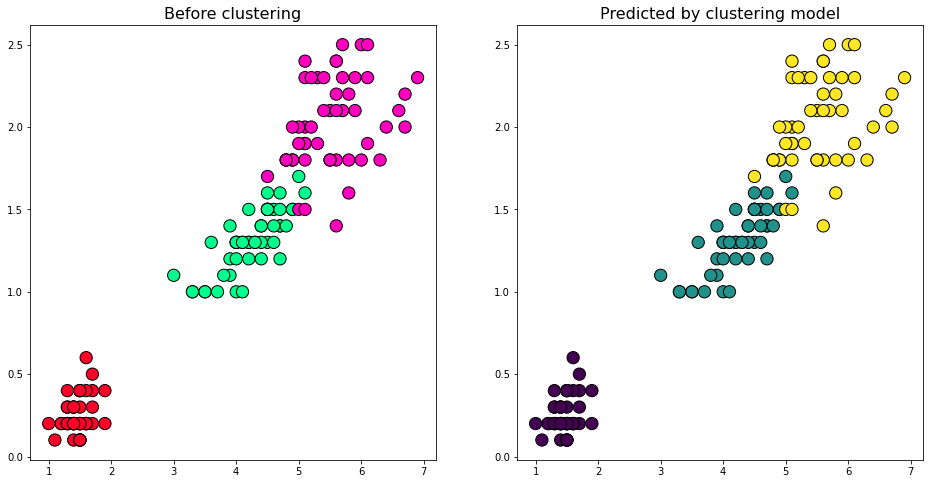

In [41]:
new_labels=Km.labels_
fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,2],X[:,3],c=y,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(X[:,2],X[:,3],c=y,cmap='viridis',edgecolor='k',s=150)
axes[0].set_title('Before clustering',fontsize=16)
axes[1].set_title('Predicted by clustering model',fontsize=16)

### CUSTOM DATA INPUT ###

In [42]:
X_Kmean=np.array([[5.8,3.2,5.7,1.9]])

### RESULT ###

In [43]:
X_Km_prediction=Km.predict(X_Kmean)
X_Km_prediction[0]
print(Category[int(X_Km_prediction[0])])

Iris-Verginica
